In [2]:
import numpy as np
from src.denselayer import DenseLayer
from src.model import Model
from src.optimizers import gradient_descent
from src.utils import one_hot_enc
from src.utils import generate_batches

In [3]:
# Generate Dataset
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

N_SAMPLES = 2000
N_CLASSES = 6
N_FEATURES = 2
TEST_SIZE = 0.1

X, y = make_blobs(n_samples=N_SAMPLES, n_features=N_FEATURES, centers=N_CLASSES, cluster_std=1.2, random_state=50)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=42)

y_test = one_hot_enc(y_test)
y_train = one_hot_enc(y_train)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1800, 2) (1800, 6)
(200, 2) (200, 6)


In [4]:
layers = [
    DenseLayer(nodes_prev=N_FEATURES,  nodes_curr=25, activation="relu"),
    DenseLayer(nodes_prev=25, nodes_curr=50, activation="relu"),
    DenseLayer(nodes_prev=50, nodes_curr=50, activation="relu"),
    DenseLayer(nodes_prev=50, nodes_curr=50, activation="relu"),
    DenseLayer(nodes_prev=50, nodes_curr=25, activation="relu"),
    DenseLayer(nodes_prev=25, nodes_curr=N_CLASSES, activation="softmax")
]

model = Model(
    layers=layers, 
    optimizer=gradient_descent
)

In [5]:
hist = model.fit(X_train, y_train, epoch=50, lr=0.001, bs=1)

Iteration: 1	 cost: 1.77773	accuracy: 17.11%
Iteration: 10	 cost: 0.35680	accuracy: 86.56%
Iteration: 20	 cost: 0.26906	accuracy: 88.61%
Iteration: 30	 cost: 0.25309	accuracy: 88.94%
Iteration: 40	 cost: 0.24579	accuracy: 89.44%
Iteration: 50	 cost: 0.24193	accuracy: 89.50%


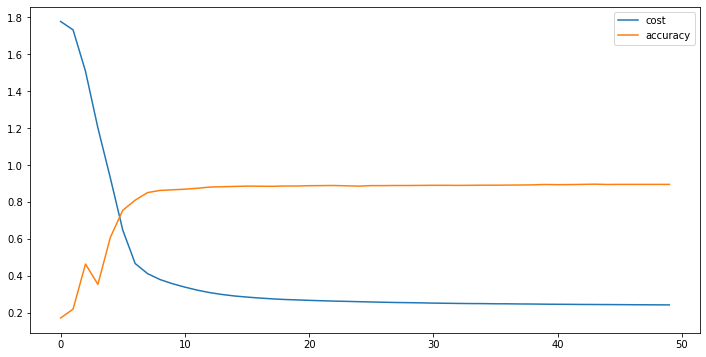

In [6]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(12,6))
plt.plot(hist)
plt.legend(['cost', 'accuracy'])
plt.show()